In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os

# Path to the folder containing CSV files
folder_path = '/users/riyakoduru/Downloads/ka-highway37'  # Change this to the path of folder

# Iterate over each file in folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        
        # Load dataset
        data = pd.read_csv(file_path)
        
        # Select numerical features for PCA, assuming all columns except the first are features
        features = data.columns[1:]
        X = data[features]
        
        # Standardize features
        X_standardized = StandardScaler().fit_transform(X)
        
        # Perform PCA
        pca = PCA()
        principal_components = pca.fit_transform(X_standardized)
        
        # Create a DataFrame for principal components
        principal_df = pd.DataFrame(data=principal_components,
                                    columns=['PC' + str(i) for i in range(1, len(features) + 1)])
        
        # Explained variance ratio
        explained_variance = pca.explained_variance_ratio_
        
        # Results
        print(f"Results for {filename}:")
        print(principal_df.head())
        print(explained_variance)
        print("\n")


Results for attack-rhs_7079_7081_0.3_1.3.csv:
         PC1        PC2         PC3       PC4       PC5       PC6       PC7  \
0  34.221679  92.919485  360.749448  9.875783  0.699948 -0.242308  1.364436   
1  18.908199   6.232084   -2.253441 -2.576485  0.120872  2.675220 -0.416092   
2  18.908199   6.232084   -2.253441 -2.576485  0.120872  2.675220 -0.416092   
3  18.908199   6.232084   -2.253441 -2.576485  0.120872  2.675220 -0.416092   
4  18.908199   6.232084   -2.253441 -2.576485  0.120872  2.675220 -0.416092   

        PC8       PC9      PC10  ...      PC17      PC18      PC19      PC20  \
0 -1.010094 -0.133245  0.827237  ... -0.020448  0.014953 -0.061332  0.063403   
1 -1.829055  3.964599 -6.810408  ... -0.190007  0.174921  0.200865 -0.189153   
2 -1.829055  3.964599 -6.810408  ... -0.190007  0.174921  0.200865 -0.189153   
3 -1.829055  3.964599 -6.810408  ... -0.190007  0.174921  0.200865 -0.189153   
4 -1.829055  3.964599 -6.810408  ... -0.190007  0.174921  0.200865 -0.189153   

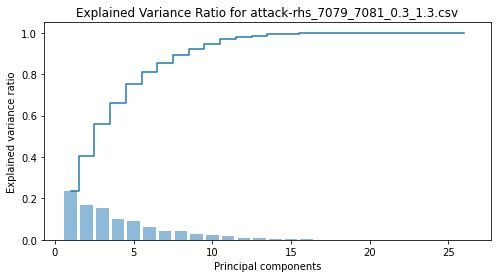

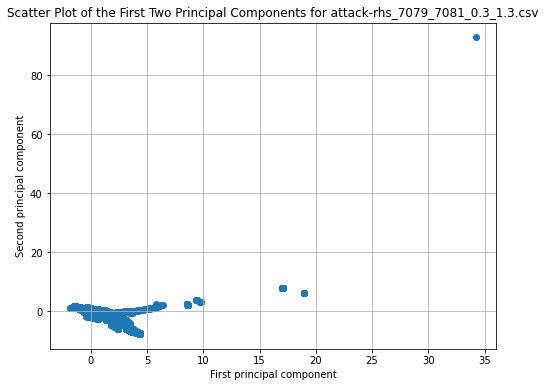

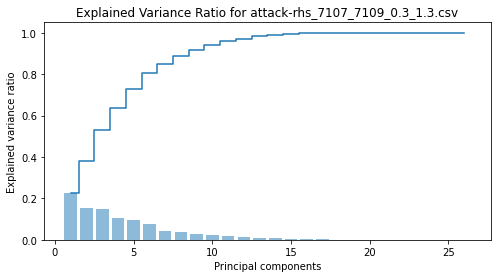

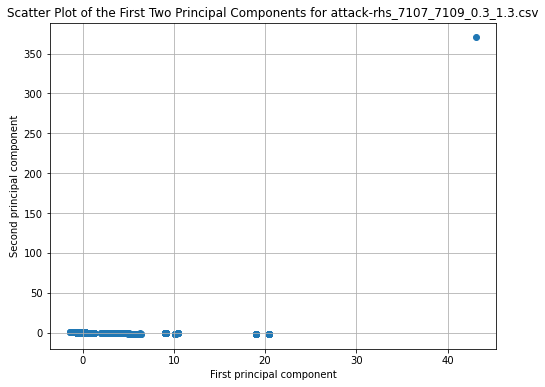

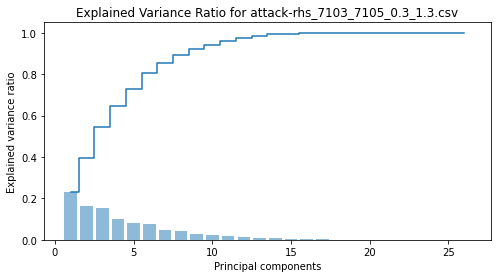

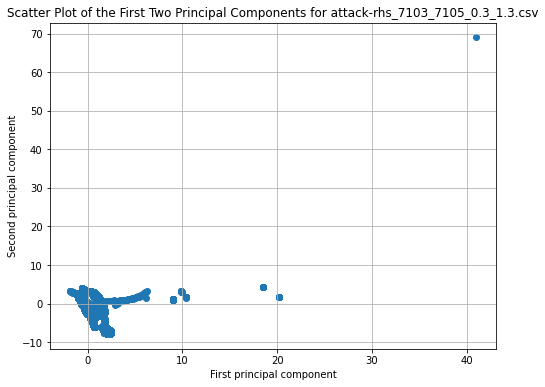

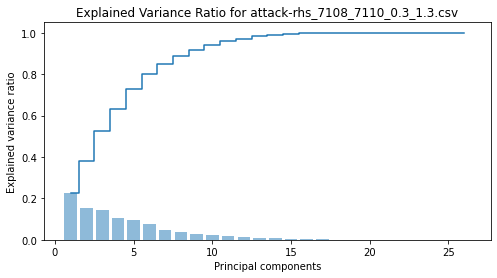

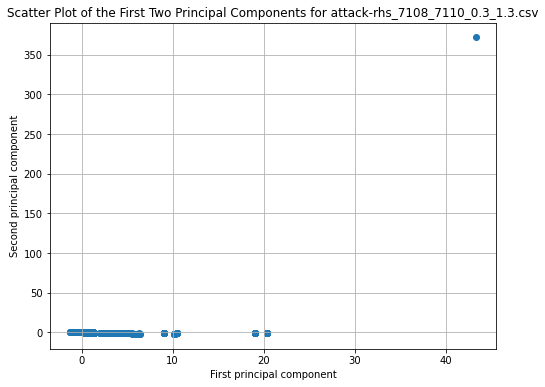

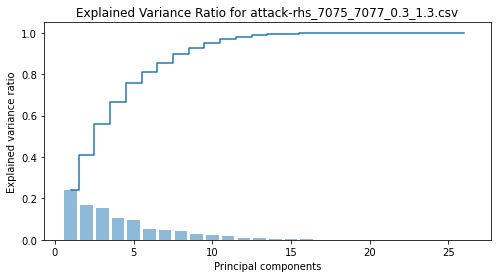

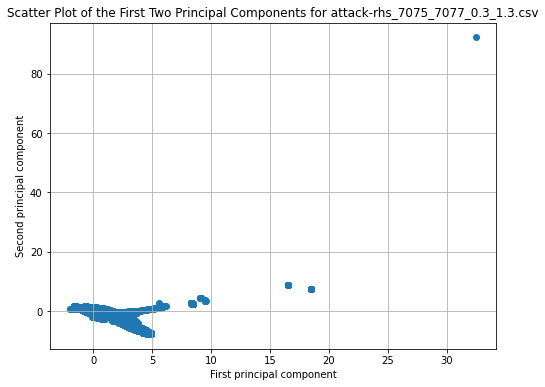

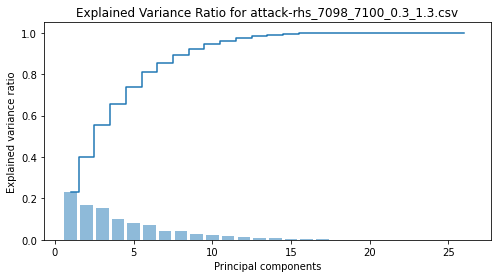

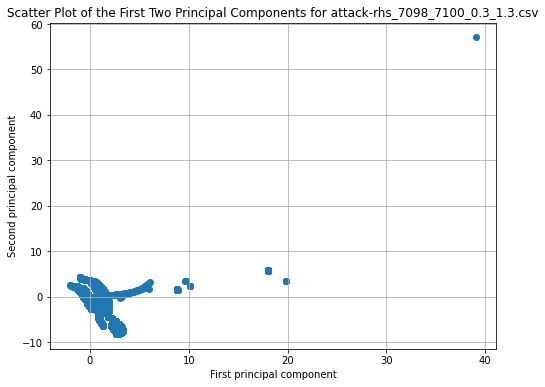

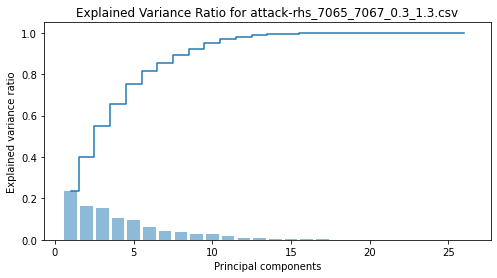

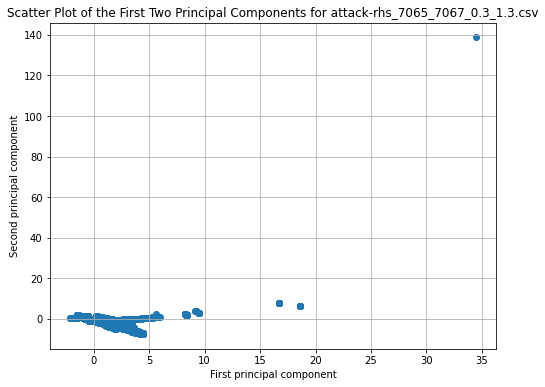

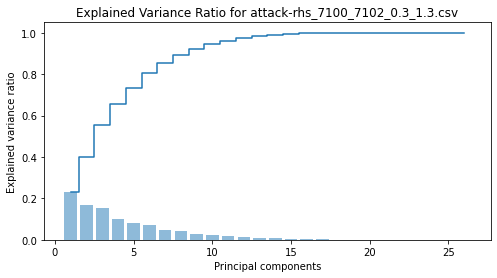

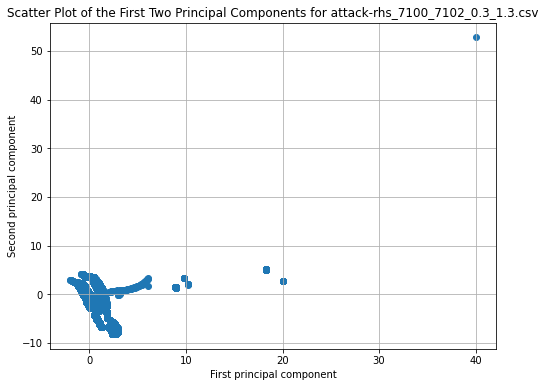

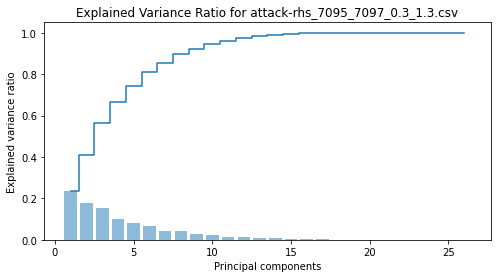

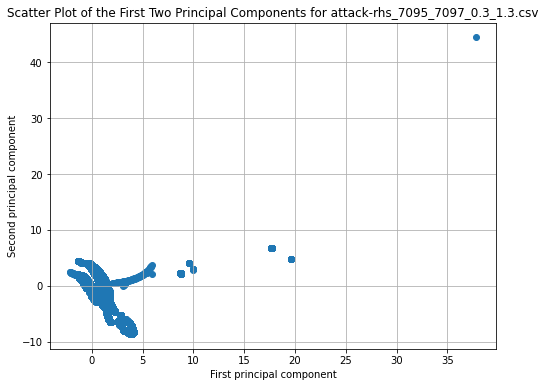

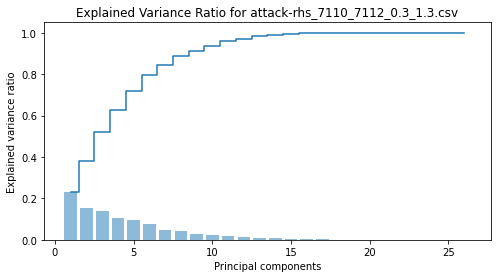

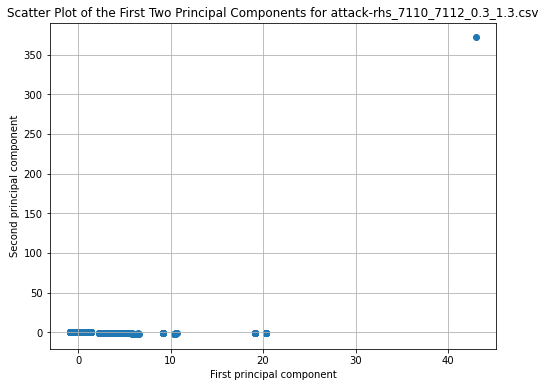

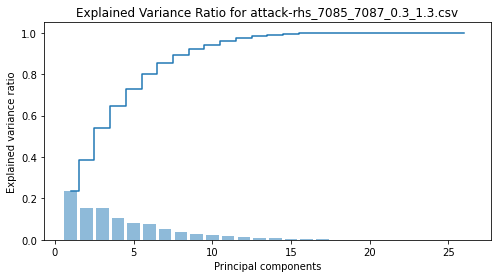

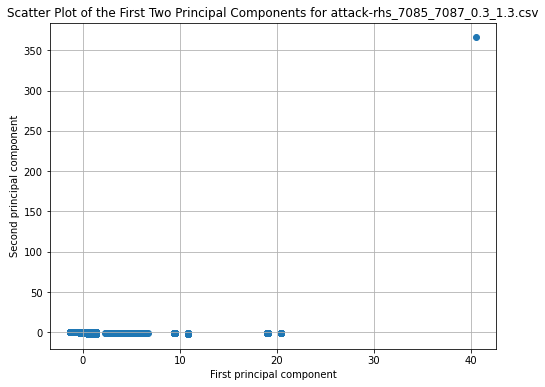

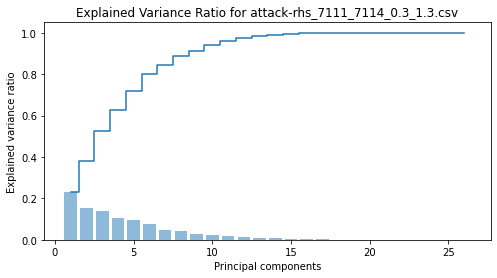

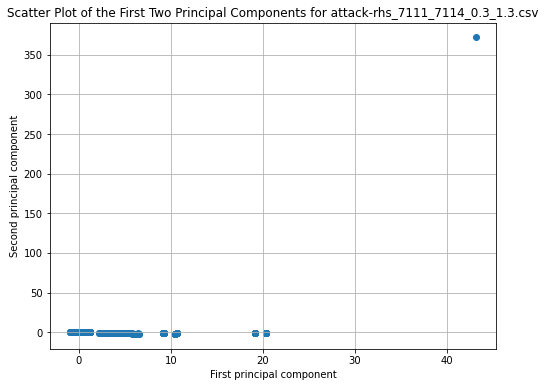

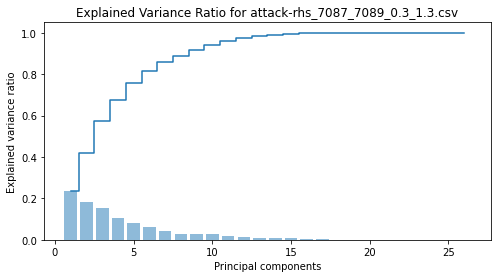

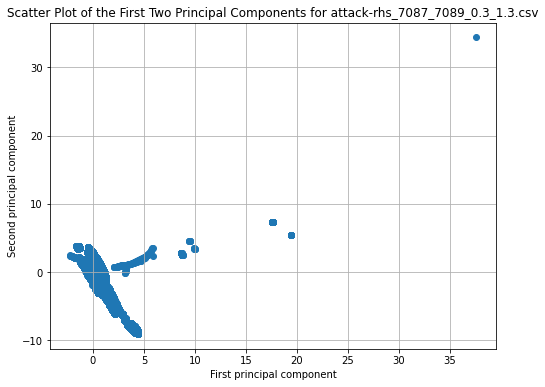

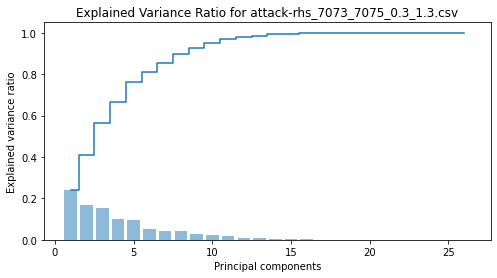

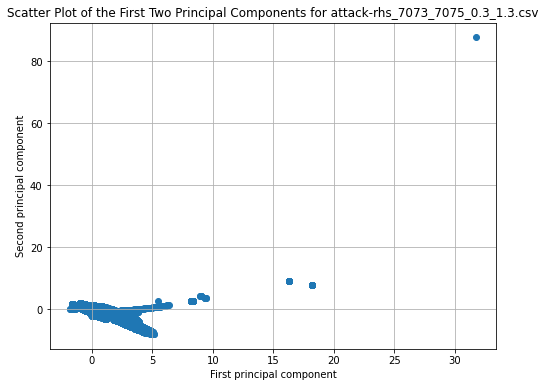

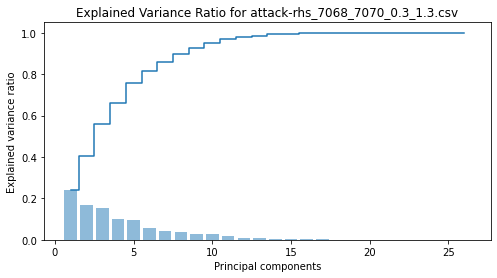

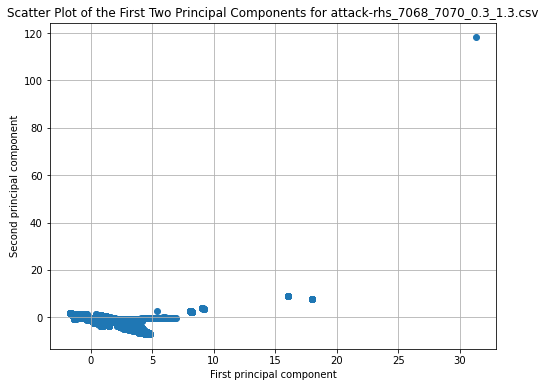

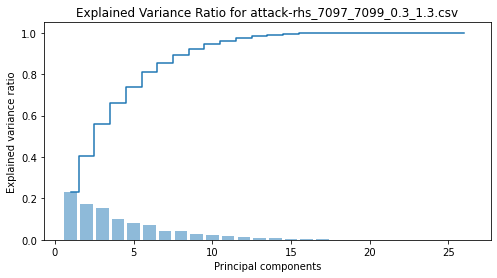

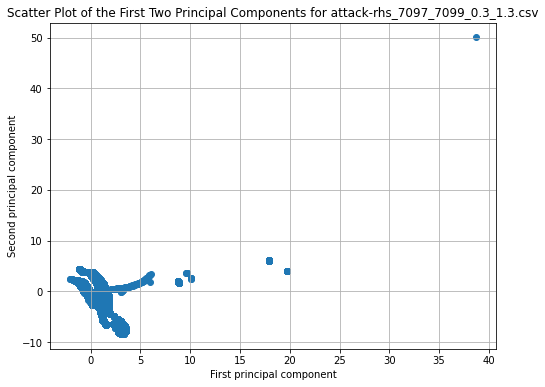

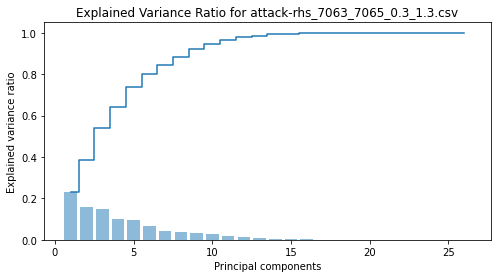

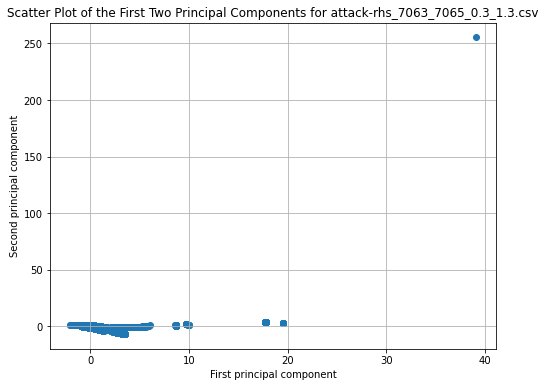

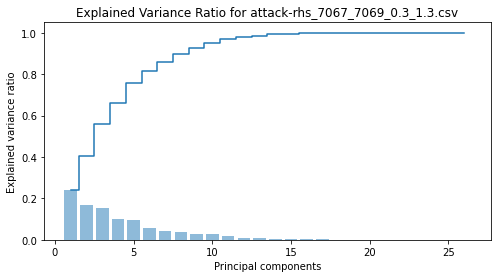

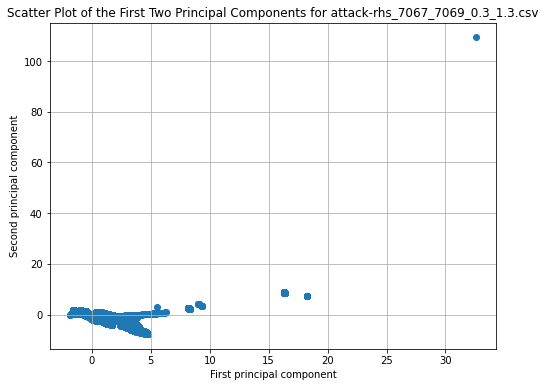

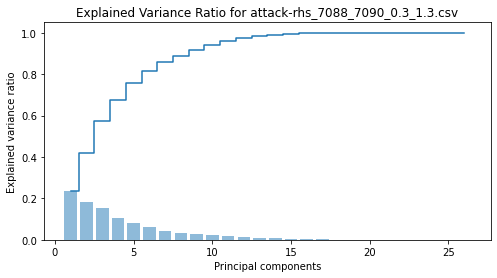

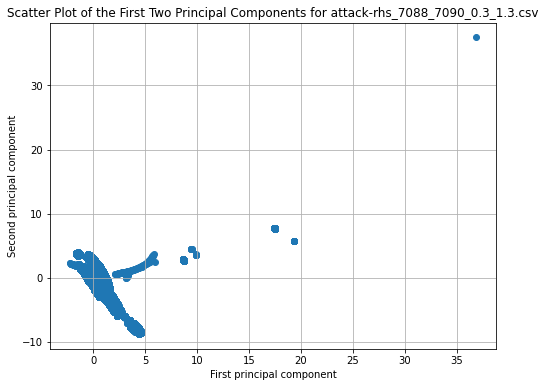

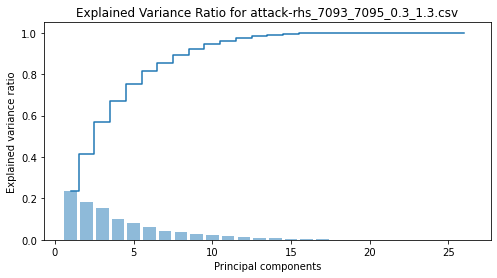

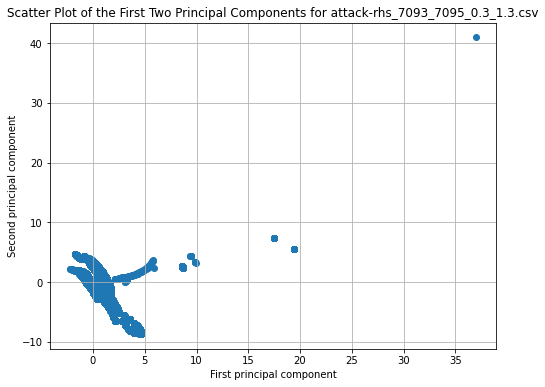

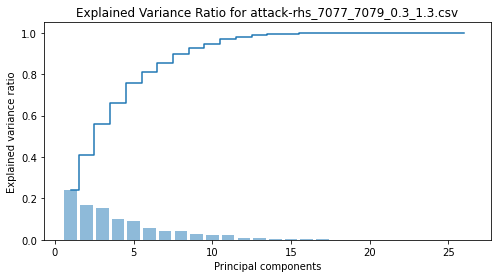

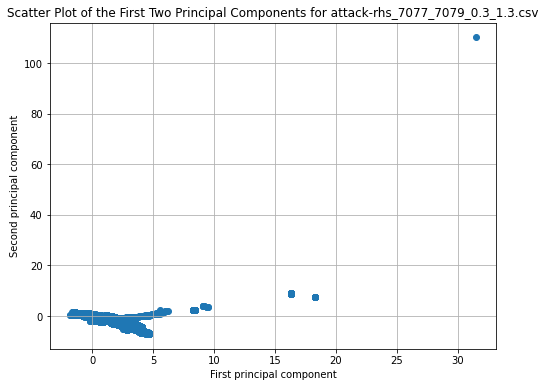

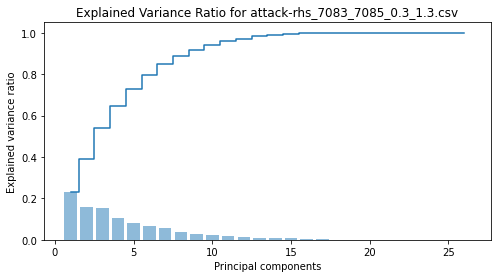

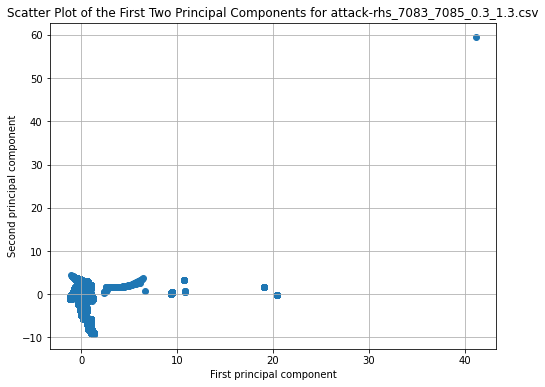

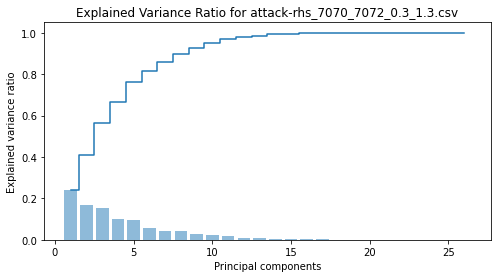

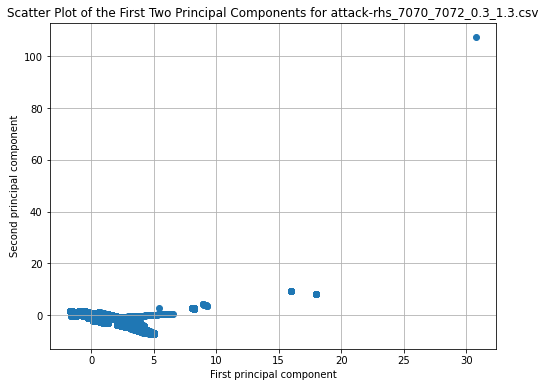

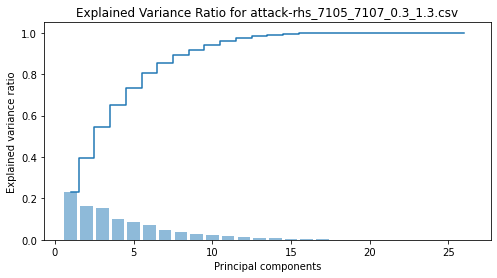

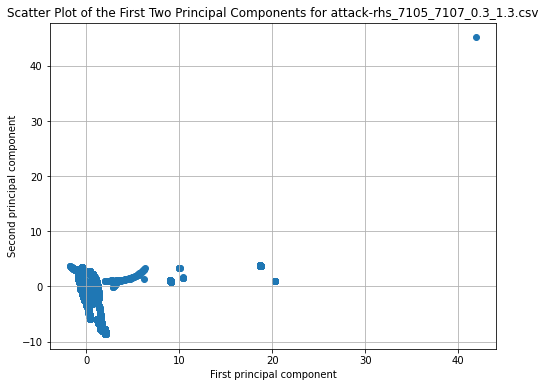

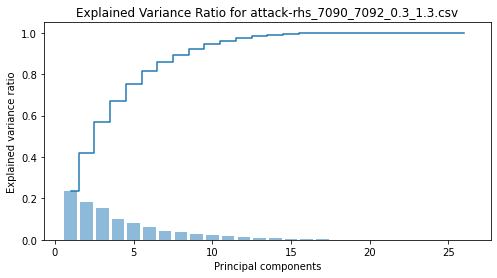

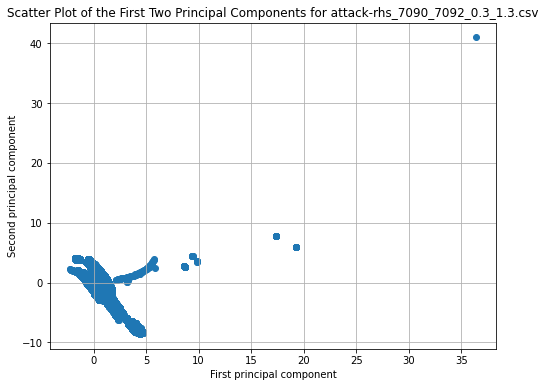

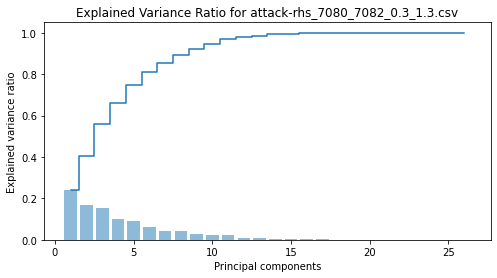

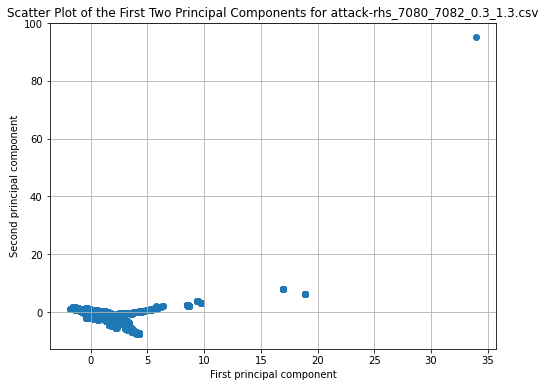

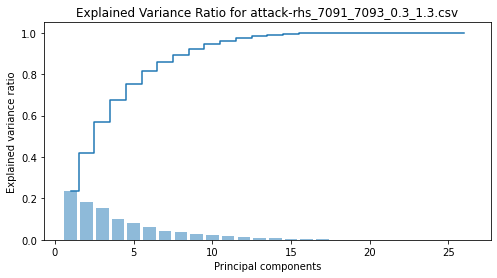

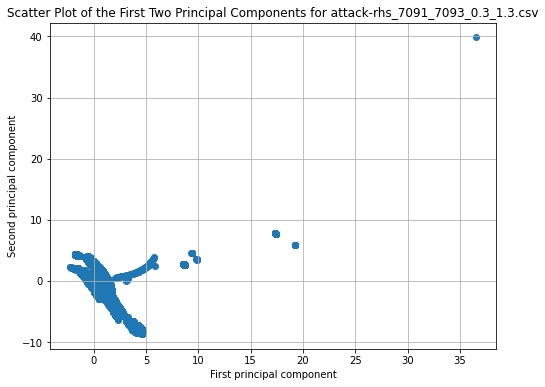

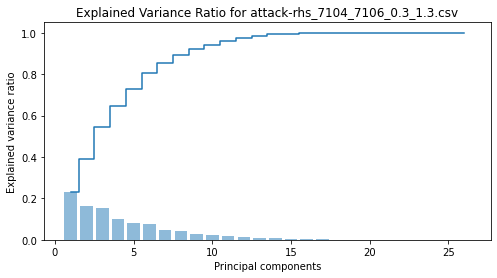

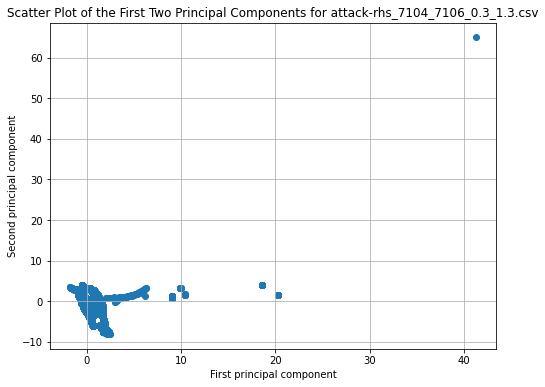

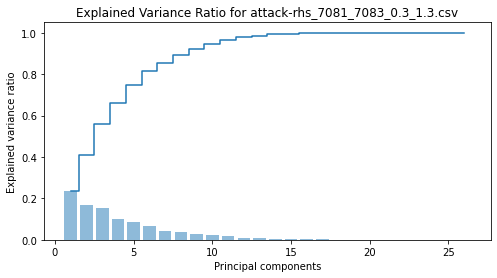

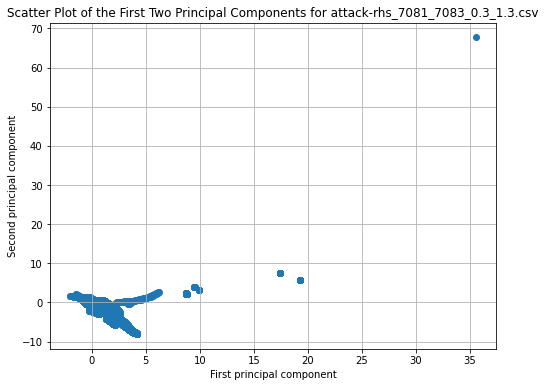

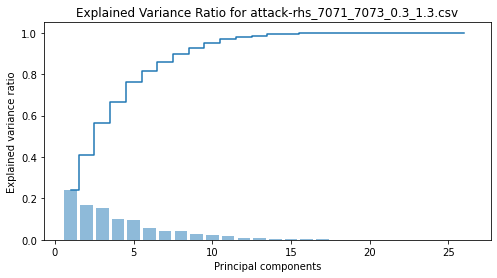

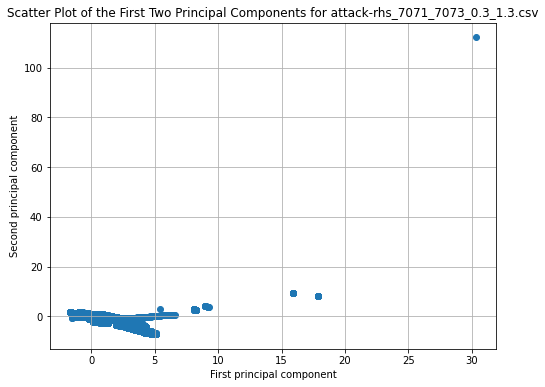

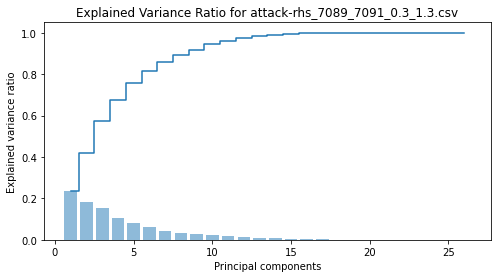

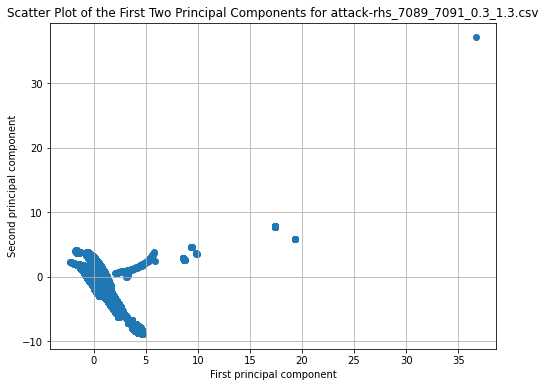

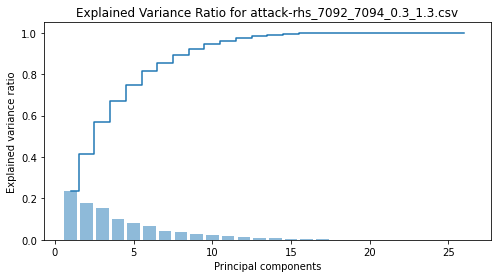

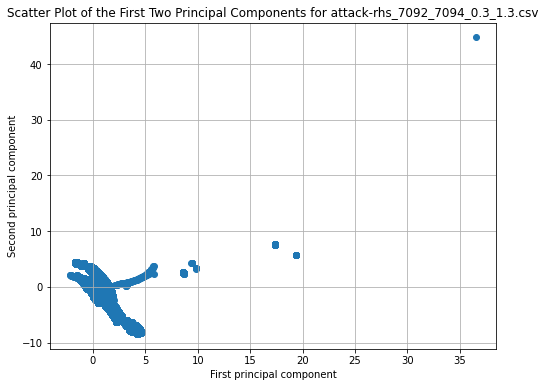

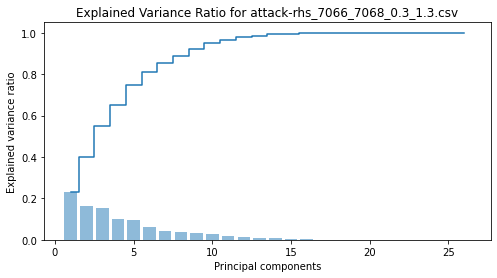

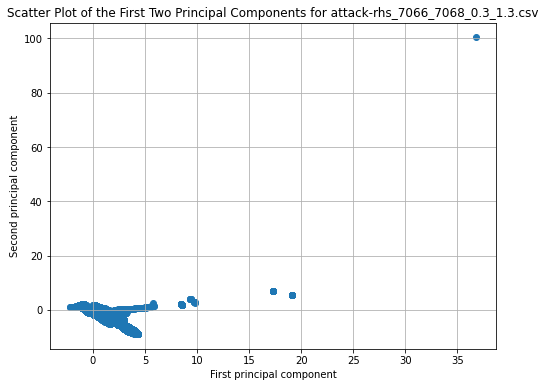

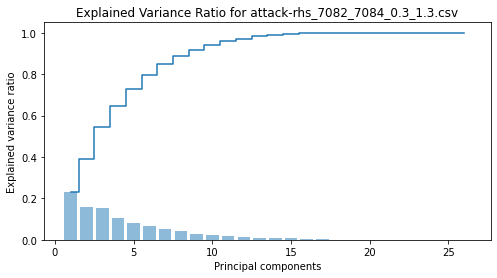

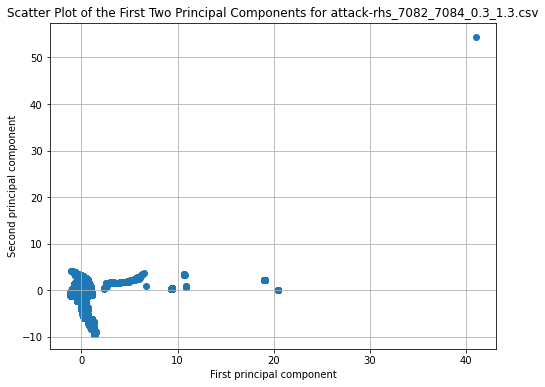

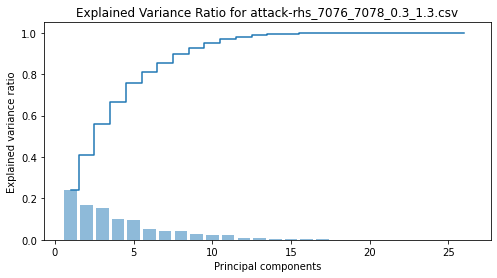

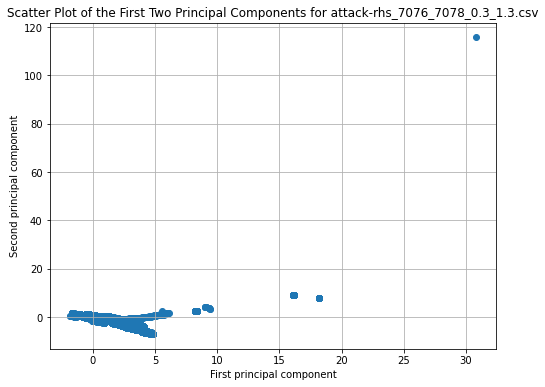

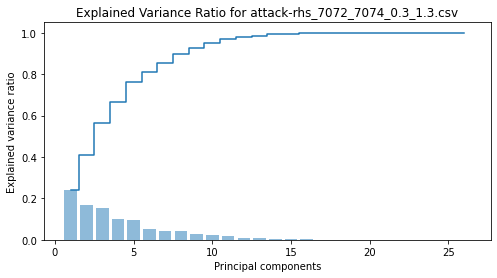

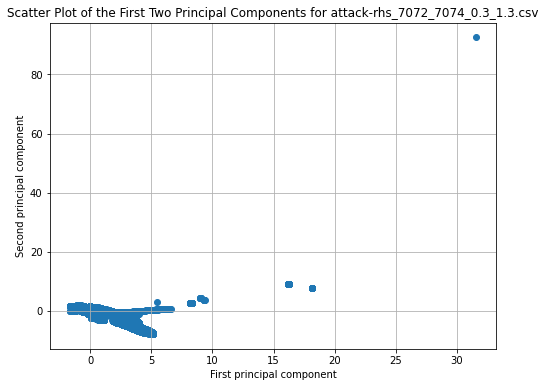

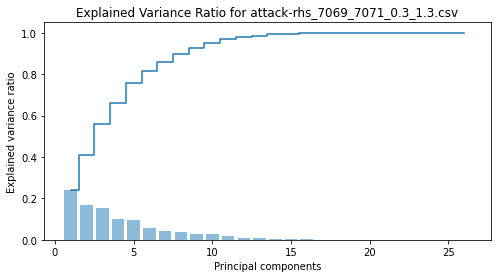

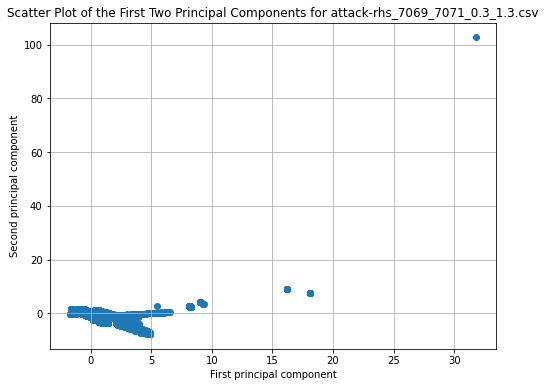

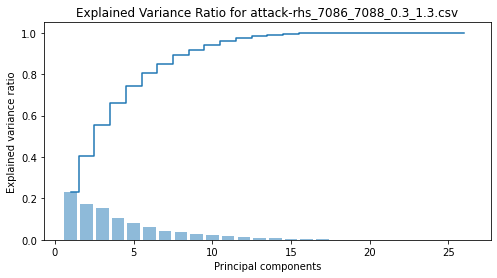

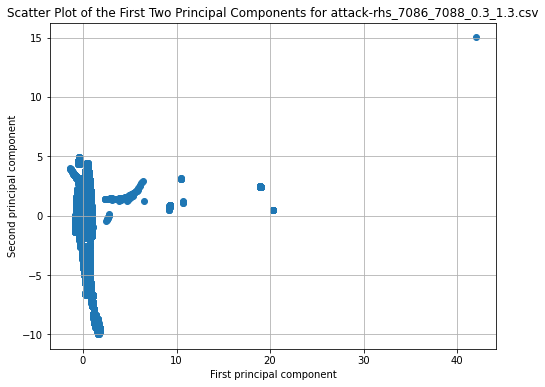

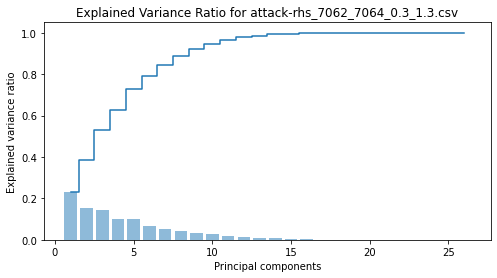

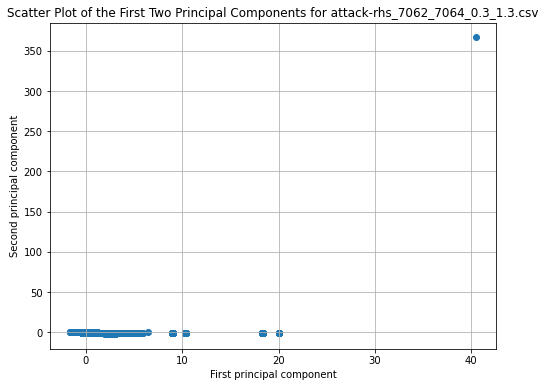

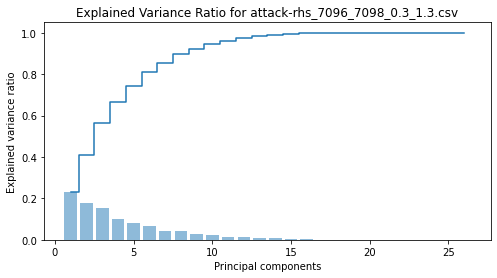

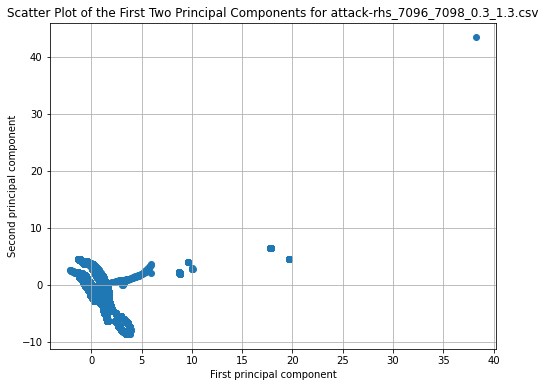

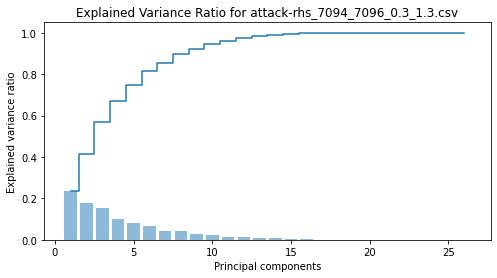

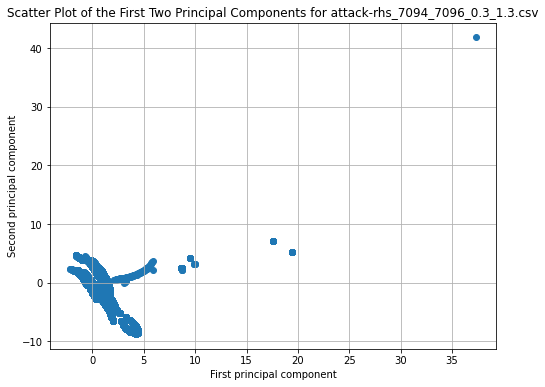

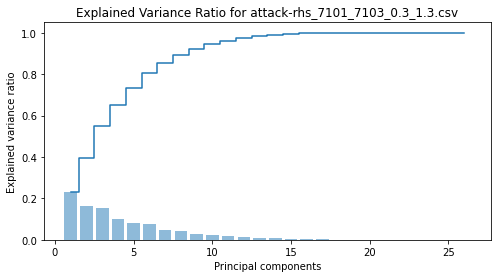

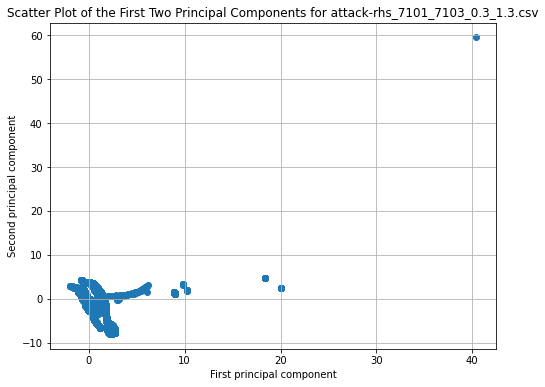

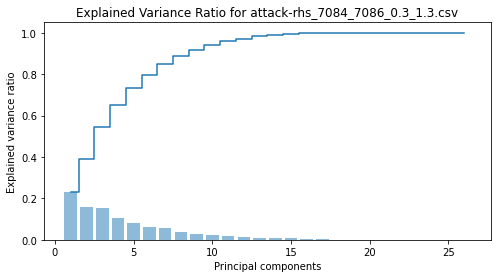

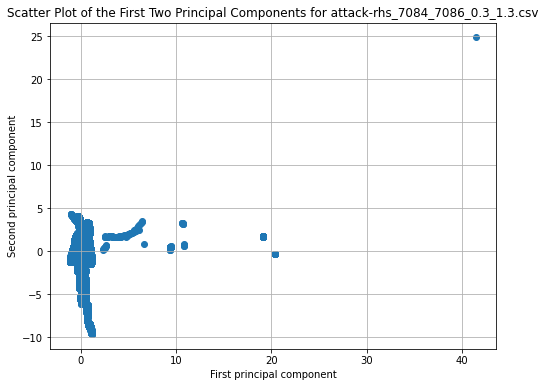

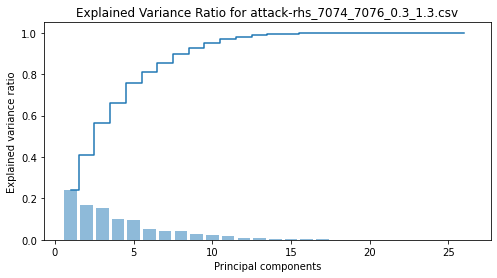

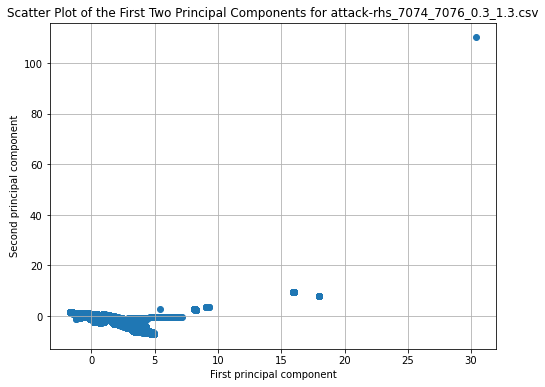

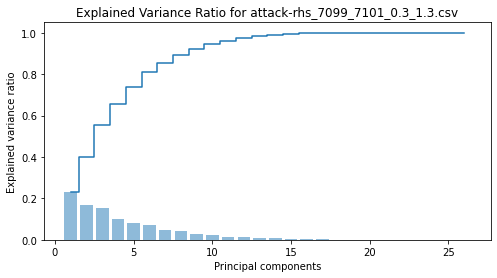

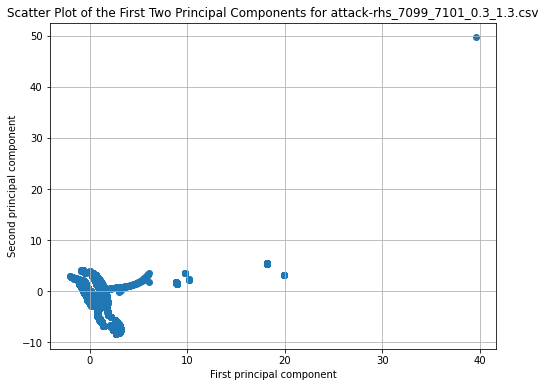

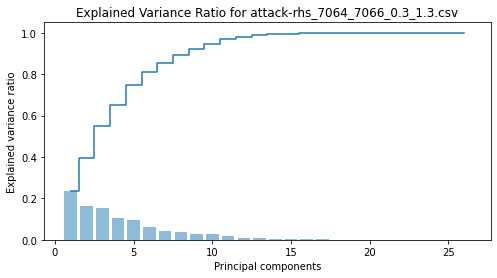

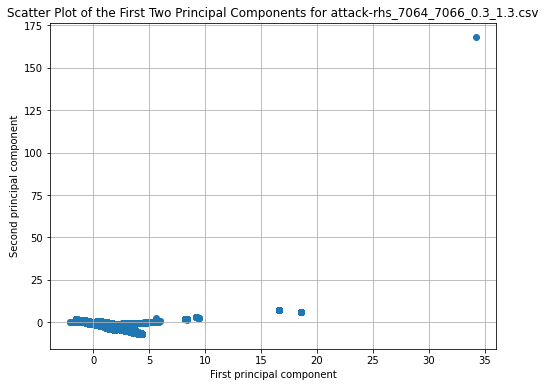

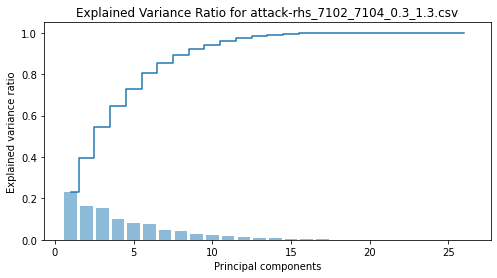

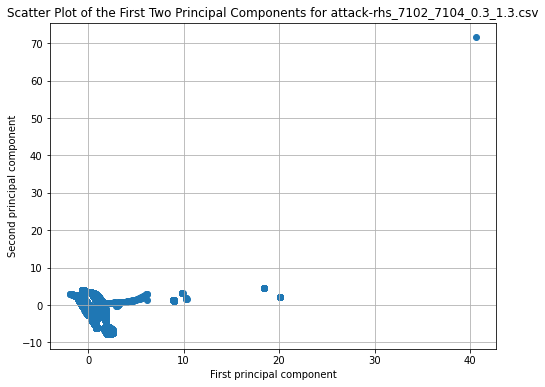

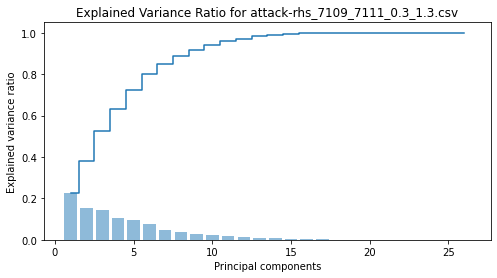

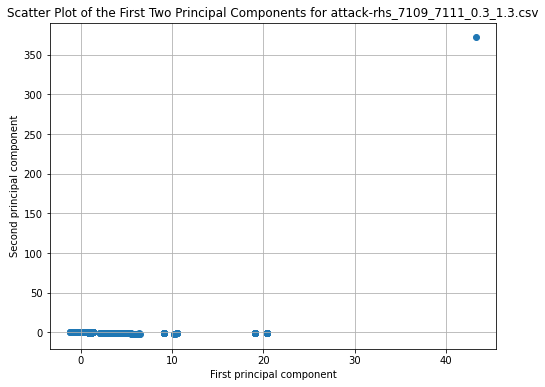

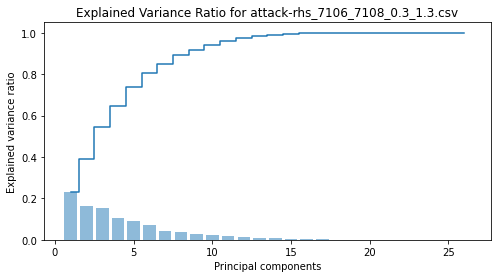

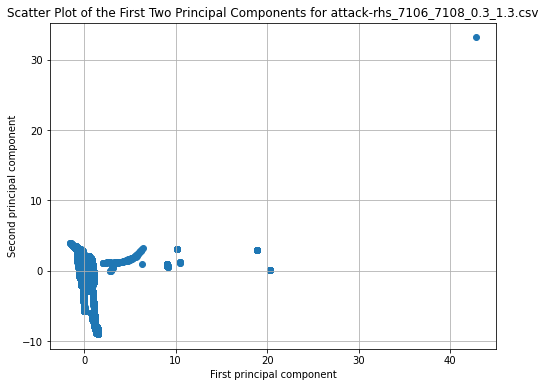

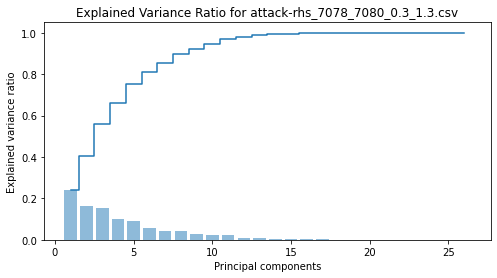

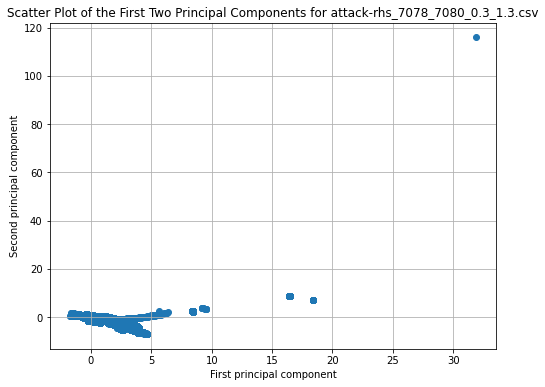

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

# Path to the folder containing CSV files
folder_path = r'/Users/riyakoduru/Downloads/ka-highway37'  # Path

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        
        # Load dataset
        data = pd.read_csv(file_path)
        
        # Select numerical features for PCA, assuming all columns except the first are features
        features = data.columns[1:]
        X = data[features]
        
        # Standardize features
        X_standardized = StandardScaler().fit_transform(X)
        
        # Perform PCA
        pca = PCA()
        principal_components = pca.fit_transform(X_standardized)
        
        # Plot explained variance ratio
        plt.figure(figsize=(8, 4))
        plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
        plt.step(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), where='mid')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.title(f'Explained Variance Ratio for {filename}')
        plt.show()

        # Plot first two principal components
        plt.figure(figsize=(8, 6))
        plt.scatter(principal_components[:, 0], principal_components[:, 1])
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.title(f'Scatter Plot of the First Two Principal Components for {filename}')
        plt.grid(True)
        plt.show()
